### CIFAR-10 and CIFAR-100 Image Classification Datasets

CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html
- CIFAR-10 contains 60000 images of 32x32 pixels in 3 channels divided by 10 classes.
- Each class contains 6000 images

### Import the libraries we'll use

In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras import utils

%matplotlib inline

#Import CIFAR-10, CIFAR-100 Classification
from keras.datasets import cifar10, cifar100

### CIFAR-10: Import and pre-process data

In [2]:
# load training and testing datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # or cifar100.load_data()

In [3]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [4]:
# Pixel values range from 0 to 255. To normalize the data, just divide all values by 255.
x_train = x_train / 255
x_test = x_test / 255

# Flatten Y_train and Y_test, so they become vectors of label values.
# The label for X_train[0] is in Y_train[0].
y_train = y_train.flatten()
y_test = y_test.flatten()

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Apply random shufflying to training examples.
np.random.seed(0)
indices = np.arange(x_train.shape[0])
shuffled_indices = np.random.permutation(indices)
x_train = x_train[shuffled_indices]
y_train = y_train[shuffled_indices]

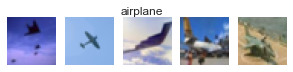

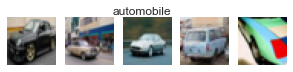

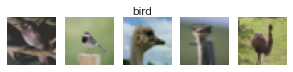

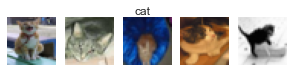

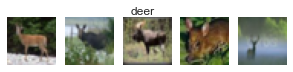

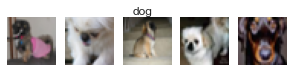

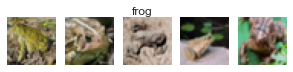

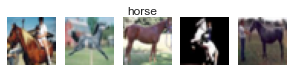

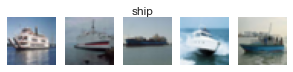

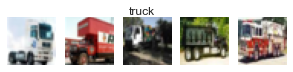

In [5]:
for i in range(len(label_names)):
    # Get the first 5 images of the class
    images = x_train[y_train == i][:5]
    # Plot the images
    fig, axs = plt.subplots(1, 5, figsize=(5,1))
    fig.suptitle(label_names[i])
    for j in range(5):
        axs[j].imshow(images[j])
        axs[j].axis('off')
    # Loop thru printing out plots
    plt.show()

#### Placeholder: Model Building Function
Create a placeholder function for building a neural net

In [20]:
def build_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [21]:
model = build_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[256, 128])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)
print(model.summary())

Epoch 1/10
704/704 [==============================] - 9s 11ms/step - loss: 1.8922 - accuracy: 0.3187 - val_loss: 1.7967 - val_accuracy: 0.3598
Epoch 2/10
704/704 [==============================] - 8s 12ms/step - loss: 1.6962 - accuracy: 0.3931 - val_loss: 1.7388 - val_accuracy: 0.3724
Epoch 3/10
704/704 [==============================] - 9s 12ms/step - loss: 1.6145 - accuracy: 0.4228 - val_loss: 1.6399 - val_accuracy: 0.4146
Epoch 4/10
704/704 [==============================] - 10s 14ms/step - loss: 1.5695 - accuracy: 0.4404 - val_loss: 1.6069 - val_accuracy: 0.4356
Epoch 5/10
704/704 [==============================] - 9s 13ms/step - loss: 1.5220 - accuracy: 0.4579 - val_loss: 1.5765 - val_accuracy: 0.4432
Epoch 6/10
704/704 [==============================] - 8s 11ms/step - loss: 1.4904 - accuracy: 0.4668 - val_loss: 1.5396 - val_accuracy: 0.4568
Epoch 7/10
704/704 [==============================] - 8s 11ms/step - loss: 1.4683 - accuracy: 0.4772 - val_loss: 1.5420 - val_accuracy: 0.461

,loss,accuracy,val_loss,val_accuracy
0,1.892184,0.318711,1.796701,0.3598
1,1.696227,0.393089,1.738811,0.3724
2,1.614535,0.422822,1.639932,0.4146
3,1.569530,0.440422,1.606934,0.4356
4,1.521995,0.457889,1.576492,0.4432
5,1.490387,0.466778,1.539644,0.4568
6,1.468300,0.477178,1.541966,0.4612
7,1.447624,0.483044,1.502203,0.4680
8,1.421644,0.493133,1.568149,0.4482
9,1.397681,0.502822,1.472572,0.4918


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________
None


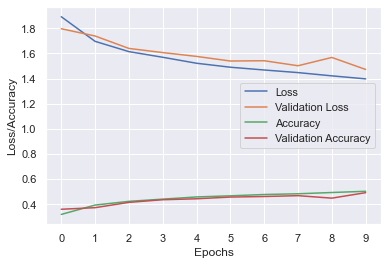

In [22]:
def plotloss(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.xticks(range(len(history)))
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend(['Loss', 'Validation Loss', 'Accuracy', 'Validation Accuracy'])
    plt.show()

plotloss(history)

In [30]:
def build_cnn_model(n_classes,
                hidden_layer_sizes=[256, 128, 64],
                activation='relu',
                optimizer='Adam',
                learning_rate=0.1):
  """Build a multi-class logistic regression model using Keras.

  Args:
    n_classes: Number of output classes in the dataset.
    hidden_layer_sizes: A list with the number of units in each hidden layer.
    activation: The activation function to use for the hidden layers.
    optimizer: The optimizer to use (SGD, Adam).
    learning_rate: The desired learning rate for the optimizer.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  # YOUR CODE HERE
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(keras.layers.Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(units=hidden_layer_size,
                                    activation = activation)) #use this for hidden layers
  model.add(keras.layers.Dense(
      units=n_classes,
      activation="softmax")) #use "softmax" for active layers
  
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

Epoch 1/10
704/704 [==============================] - 22s 30ms/step - loss: 1.6395 - accuracy: 0.4080 - val_loss: 1.4534 - val_accuracy: 0.4874
Epoch 2/10
704/704 [==============================] - 22s 31ms/step - loss: 1.3357 - accuracy: 0.5308 - val_loss: 1.3348 - val_accuracy: 0.5388
Epoch 3/10
704/704 [==============================] - 22s 31ms/step - loss: 1.2262 - accuracy: 0.5714 - val_loss: 1.2986 - val_accuracy: 0.5528
Epoch 4/10
704/704 [==============================] - 22s 31ms/step - loss: 1.1585 - accuracy: 0.5940 - val_loss: 1.1786 - val_accuracy: 0.5924
Epoch 5/10
704/704 [==============================] - 20s 29ms/step - loss: 1.1019 - accuracy: 0.6176 - val_loss: 1.1214 - val_accuracy: 0.6176
Epoch 6/10
704/704 [==============================] - 21s 30ms/step - loss: 1.0541 - accuracy: 0.6348 - val_loss: 1.1800 - val_accuracy: 0.5972
Epoch 7/10
704/704 [==============================] - 23s 33ms/step - loss: 1.0202 - accuracy: 0.6468 - val_loss: 1.1002 - val_accuracy:

,loss,accuracy,val_loss,val_accuracy
0,1.639507,0.408044,1.453408,0.4874
1,1.335703,0.530822,1.334809,0.5388
2,1.226169,0.571378,1.298626,0.5528
3,1.158522,0.594044,1.178560,0.5924
4,1.101907,0.617578,1.121364,0.6176
5,1.054076,0.634800,1.179977,0.5972
6,1.020237,0.646800,1.100218,0.6232
7,0.983543,0.658622,1.056330,0.6390
8,0.961200,0.669000,1.012200,0.6530
9,0.942198,0.675667,1.025731,0.6530


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

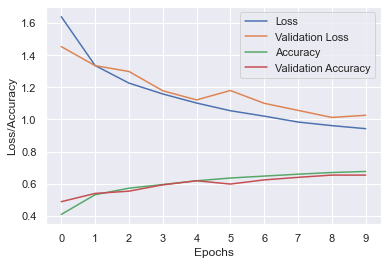

In [31]:
model = build_cnn_model(len(label_names), learning_rate=0.01, hidden_layer_sizes=[])

history = model.fit(
  x = x_train,
  y = y_train,
  epochs=10,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

history = pd.DataFrame(history.history)
display(history)
print(model.summary())
plotloss(history)